# 점진적인 학습

In [1]:
"""
< 점진적 학습 >
 - 훈련에 필요한 데이터가 한번에 다 수집된 경우가 아니라,
   시간차를 두고 수집이 되는 경우에는 어떻게 훈련을 시킬지를 해결함
 - 데이터가 수집 될 때마다 학습을 이어나가는 훈련 방식을 의미함
 - 점진적 학습의 대표적인 알고리즘으로 "확률적 경사하강법"이 주로 쓰임
"""

'\n< 점진적 학습 >\n - 훈련에 필요한 데이터가 한번에 다 수집된 경우가 아니라,\n   시간차를 두고 수집이 되는 경우에는 어떻게 훈련을 시킬지를 해결함\n - 데이터가 수집 될 때마다 학습을 이어나가는 훈련 방식을 의미함\n - 점진적 학습의 대표적인 알고리즘으로 "확률적 경사하강법"이 주로 쓰임\n'

In [2]:
"""
< 확률적 경사 하강법(SGD: Stochastic Gradient Descent) >
 - 경사 : 기울기를 의미함
 - 하강법 : 내려가는 방법
 - 경사 하강법
   :원하는 지점(결과값)에 도달하기 위해 가장 가파른 경사를 따라
    내려가는 방법을 찾는 방법
 - 확률적 : "무작위" or "랜덤" 하게의 기술적 표현으로 확률적 이라고 칭함
 - 훈련데이터의 전체 특성들 중에서 하나씩 랜덤하게 선택하여
   가장 가파른 길을 찾아내는 방법 (확률적 경사 하강법)
"""

'\n< 확률적 경사 하강법(SGD: Stochastic Gradient Descent) >\n - 경사 : 기울기를 의미함\n - 하강법 : 내려가는 방법\n - 경사 하강법\n   :원하는 지점(결과값)에 도달하기 위해 가장 가파른 경사를 따라\n    내려가는 방법을 찾는 방법\n - 확률적 : "무작위" or "랜덤" 하게의 기술적 표현으로 확률적 이라고 칭함\n - 훈련데이터의 전체 특성들 중에서 하나씩 랜덤하게 선택하여\n   가장 가파른 길을 찾아내는 방법 (확률적 경사 하강법)\n'

In [3]:
"""
< 내부적으로 처리되는 확률적 경사 하강법 순서 >
 1. 훈련데이터(독립변수)에서 랜덤하게 하나의 특성을 선택하게 됨
 2. 선택한 특성(독립변수)을 이용해서 경사를 조금씩 내려갑니다.
 3. 내려 갈 수 있을때까지 하강합니다.
 4. 훈련 세트에서 다른 특성을 랜덤하게 또 다시 선택하여 1~3번을 반복합니다.
"""

'\n< 내부적으로 처리되는 확률적 경사 하강법 순서 >\n 1. 훈련데이터(독립변수)에서 랜덤하게 하나의 특성을 선택하게 됨\n 2. 선택한 특성(독립변수)을 이용해서 경사를 조금씩 내려갑니다.\n 3. 내려 갈 수 있을때까지 하강합니다.\n 4. 훈련 세트에서 다른 특성을 랜덤하게 또 다시 선택하여 1~3번을 반복합니다.\n'

### 데이터 준비하기

In [4]:
### 07_fish.csv 파일 읽어들이기
# - 변수명 : fish

import pandas as pd
file_path = "./data/07_fish.csv"
fish = pd.read_csv(file_path)
fish

### Species  Weight  Length  Diagonal  Height  Width
#    종류     무게    길이    대각선    높이    두께
# - 종속변수 : 종류 (범주형)
# - 독립변수 : 나머지 모두

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...
154,Smelt,12.2,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,14.3,15.2,2.8728,2.0672


### 데이터 전처리

In [5]:
### 독립변수와 종속변수 데이터 추출 및 배열로 변환하기
# 독립변수 : fihs_input
fish_input = fish[["Weight", "Length", "Diagonal", "Height", "Width"]].to_numpy()

# 종속변수 : fish_target
fish_target = fish["Species"].to_numpy()

fish_input.shape, fish_target.shape

((159, 5), (159,))

In [6]:
### 분리비율 75:25 (디폴트로 생략가능)
# - 랜덤값 : 42
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = \
              train_test_split(fish_input, fish_target,  
                               test_size=0.25, random_state=42)

train_input.shape, train_target.shape, test_input.shape, test_target.shape

((119, 5), (119,), (40, 5), (40,))

In [7]:
### 독립변수 정규화하기
from sklearn.preprocessing import StandardScaler

### 클래스(객체) 생성
ss = StandardScaler()
### 표준화를 위한 점수를 생성하기 위한 패턴 찾기
ss.fit(train_input)

### 찾은 패턴으로 데이터 변환하기
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

train_scaled.shape, test_scaled.shape

((119, 5), (40, 5))

# 훈련시키기

In [8]:
### 라이브러리 불러들이기
from sklearn.linear_model import SGDClassifier

In [9]:
### 모델(클래스) 생성하기
# - max_iter : 훈련 반복횟수
#            : 전체 특성(독립변수)이 다 끝나면 1회로 봅니다.
#            : 반복횟수를 "에포크(epoch)"라고 칭합니다.
#            : 훈련 반복횟수가 부족한 경우에도 정의된 반복횟수 만큼만 진행됨
#            : 정의된 반복횟수 전에 훈련이 끝나는 경우도 있음
#            : 가장 적합한 반봇횟수를 찾는 작업도 필요함(하이퍼파라메터 튜닝)
#              (반복횟수는 사람이 결정함)

# - loss : 손실함수(log : 로지스틱 손실함수 사용됨)
#        : 조금씩 내려오면서 손실이 작은 쪽을 찾아서 내려오기 위한 방법
#        : 사람은 솔실이 작은 값들을 알 수 없음
#        : 학습모델이 가지고 있는 손실계산식을 통해 결정되기에 사람은 관여 안함
#        : 훈련모델이 분류 결과에 만족한다면, 훈련을 종료시킴
#        : 사람은 분류 성격에 맞게 사용할 손실함수를 지정만하면 됨
sc = SGDClassifier(loss="log", max_iter=10, random_state=42)
sc

SGDClassifier(loss='log', max_iter=10, random_state=42)

In [10]:
### 훈련시키기
sc.fit(train_scaled, train_target)

C:\anaconda3\envs\sejong_ml\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
C:\anaconda3\envs\sejong_ml\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


SGDClassifier(loss='log', max_iter=10, random_state=42)

In [11]:
### 정확도 확인하기
train_score = sc.score(train_scaled, train_target)
test_score = sc.score(test_scaled, test_target)
train_score, test_score

### 해석
# - 전체적으로 학습능력은 떨어짐
# - 과소적합이 다소 보임

(0.773109243697479, 0.775)

In [12]:
### 계속 이어서 학습 시키기
# - 다시 10번 훈련시키기
sc.partial_fit(train_scaled, train_target)

### 정확도 확인하기
train_score = sc.score(train_scaled, train_target)
test_score = sc.score(test_scaled, test_target)
train_score, test_score

### 해석
# - 전체 훈련정확도는 높아졌으나, 과소적합은 나타나고 있음

(0.8151260504201681, 0.85)

# 에포크(반복횟수) 찾아내기

In [13]:
import numpy as np

In [14]:
### 클래스(모델) 새로 생성하기
# - 반복 횟수는 정의하지 않음
sc = SGDClassifier(loss="log", random_state=42)

### 반복시 저장할 스코어 변수 정의
train_score = []
test_score = []

In [15]:
### 종속변수값 확인하기
classes = np.unique(train_target)
classes

array(['Bream', 'Parkki', 'Perch', 'Pike', 'Roach', 'Smelt', 'Whitefish'],
      dtype=object)

In [16]:
### 반복을 통해 반봇횟수별 스코어 저장
for _ in range(0, 300, 1) :
    ### classes : 훈련에 사용할 범주(종속변수 지정)
    # - 향후 현업에서 종속변수의 값을 수정해서 넣으셔서 훈련하셔도 됩니다.
    sc.partial_fit(train_scaled, train_target, classes=classes)
    
    train_score.append(sc.score(train_scaled, train_target))
    test_score.append(sc.score(test_scaled, test_target))

C:\anaconda3\envs\sejong_ml\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


In [17]:
len(train_score), len(test_score)

(300, 300)

In [18]:
train_score

[0.5294117647058824,
 0.6218487394957983,
 0.6386554621848739,
 0.7310924369747899,
 0.7226890756302521,
 0.7310924369747899,
 0.7647058823529411,
 0.7310924369747899,
 0.8151260504201681,
 0.7478991596638656,
 0.8319327731092437,
 0.8151260504201681,
 0.8571428571428571,
 0.8571428571428571,
 0.8403361344537815,
 0.865546218487395,
 0.865546218487395,
 0.865546218487395,
 0.8739495798319328,
 0.8739495798319328,
 0.8739495798319328,
 0.865546218487395,
 0.865546218487395,
 0.8823529411764706,
 0.865546218487395,
 0.8823529411764706,
 0.8823529411764706,
 0.8823529411764706,
 0.8907563025210085,
 0.8907563025210085,
 0.8907563025210085,
 0.8907563025210085,
 0.8823529411764706,
 0.8823529411764706,
 0.8907563025210085,
 0.907563025210084,
 0.907563025210084,
 0.8991596638655462,
 0.907563025210084,
 0.8991596638655462,
 0.8991596638655462,
 0.907563025210084,
 0.907563025210084,
 0.907563025210084,
 0.9159663865546218,
 0.9159663865546218,
 0.9243697478991597,
 0.9243697478991597,
 0.9

In [19]:
### 반복횟수별 훈련 및 테스트 정확도 비교 시각화

In [20]:
import matplotlib.pyplot as plt

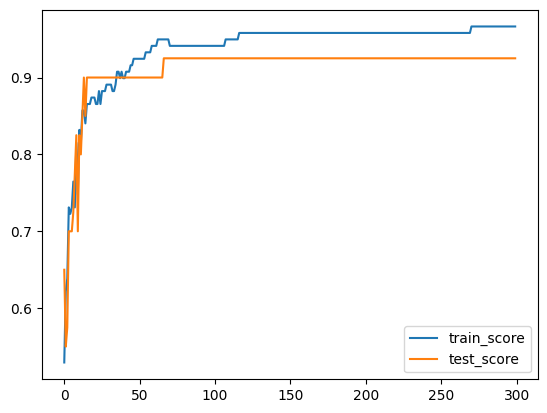

In [21]:
plt.plot(train_score, label="train_score")
plt.plot(test_score, label="test_score")
plt.legend()
plt.show()

### (해석 방법)
# - 훈련 및 테스트 두 선분이 가장 가까운 지점 중에
# - 과대 또는 과소가 일어나는 지점의 바로 전부분을 확인( 단, 가장 가까운..)
# - 적합한 지점을 사람이 선택 ( 이번경우 100 에포크가 가장 적합한 지점임)
# - max_iter 값에 선택 값을 넣어서 다시 학습시키면 됨

### 찾은 max_iter 값을 정의하여 훈련 시키기

In [22]:
### tol = "None" : 훈련이 끝나더라도 종료하지 말고, max_iter 획수만큼 진행
sc = SGDClassifier(loss="log", max_iter=100, tol=None, random_state=42)
sc

SGDClassifier(loss='log', max_iter=100, random_state=42, tol=None)

In [23]:
### 훈련시키기
sc.fit(train_scaled, train_target)

C:\anaconda3\envs\sejong_ml\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


SGDClassifier(loss='log', max_iter=100, random_state=42, tol=None)

In [24]:
### 정확도 확인하기
train_score = sc.score(train_scaled, train_target)
test_score = sc.score(test_scaled, test_target)
train_score, test_score

(0.957983193277311, 0.925)

In [25]:
# partial_fit() : 횟수를 계속 이어서 훈련시키는 것임

### 전체 데이터 예측하기

In [26]:
"""
- 전체 fish 데이터 전체 예측하기
- 실제 데이터와 예측 데이터를 비교해서..
- 정답 몇개, 오답 몇개 확인하기
"""

'\n- 전체 fish 데이터 전체 예측하기\n- 실제 데이터와 예측 데이터를 비교해서..\n- 정답 몇개, 오답 몇개 확인하기\n'

In [27]:
fish

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...
154,Smelt,12.2,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,14.3,15.2,2.8728,2.0672


In [28]:
# ----------강사님이랑 같이 -------------------

In [29]:
### 독립변수 전체 추출하기
predict_data = fish[["Weight", "Length", "Diagonal", "Height", "Width"]].to_numpy()
predict_data.shape

(159, 5)

In [30]:
### 전체 독립변수 정규화 시키기
ss = StandardScaler()
ss.fit(predict_data)
predict_scaled = ss.transform(predict_data)
predict_scaled.shape

(159, 5)

In [31]:
### 전체 돌릭변수 예측하기
result_predict = sc.predict(predict_scaled)
result_predict

array(['Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream',
       'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream',
       'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream',
       'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream',
       'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream',
       'Roach', 'Roach', 'Roach', 'Roach', 'Roach', 'Roach', 'Roach',
       'Roach', 'Roach', 'Roach', 'Roach', 'Roach', 'Roach', 'Roach',
       'Roach', 'Roach', 'Roach', 'Roach', 'Roach', 'Perch', 'Perch',
       'Roach', 'Perch', 'Perch', 'Perch', 'Perch', 'Parkki', 'Parkki',
       'Parkki', 'Parkki', 'Parkki', 'Parkki', 'Parkki', 'Parkki',
       'Parkki', 'Parkki', 'Bream', 'Smelt', 'Perch', 'Perch', 'Perch',
       'Perch', 'Perch', 'Perch', 'Perch', 'Perch', 'Perch', 'Perch',
       'Perch', 'Perch', 'Perch', 'Perch', 'Perch', 'Perch', 'Perch',
       'Perch', 'Perch', 'Perch', 'Perch', 'Perch', 'Perch', 'Perch',
       'Perch', 'Pe

In [32]:
### 결과비교를 위해 데이터프레임으로 처리
df = fish[["Weight",  "Length",  "Diagonal",  "Height",  "Width"]]
df["Species"] = fish["Species"]
df["Species_pred"] = result_predict
df

,Weight,Length,Diagonal,Height,Width,Species,Species_pred
0,242.0,25.4,30.0,11.5200,4.0200,Bream,Bream
1,290.0,26.3,31.2,12.4800,4.3056,Bream,Bream
2,340.0,26.5,31.1,12.3778,4.6961,Bream,Bream
3,363.0,29.0,33.5,12.7300,4.4555,Bream,Bream
4,430.0,29.0,34.0,12.4440,5.1340,Bream,Bream
...,...,...,...,...,...,...,...
154,12.2,12.2,13.4,2.0904,1.3936,Smelt,Smelt
155,13.4,12.4,13.5,2.4300,1.2690,Smelt,Smelt
156,12.2,13.0,13.8,2.2770,1.2558,Smelt,Smelt
157,19.7,14.3,15.2,2.8728,2.0672,Smelt,Perch


In [33]:
### 정답/오답 확인하기
# - 정답갯수 추출
o_cnt = len(df[df["Species"] == df["Species_pred"]]) 
o_cnt

# - 오답갯수 추출
x_cnt = len(df[df["Species"] != df["Species_pred"]]) 
x_cnt 

all_cnt = len(df) 
all_cnt

print("총 [{}]건 중에, 정답갯수 [{}]건 / 오답갯수 [{}]".format(all_cnt, o_cnt, x_cnt))

총 [159]건 중에, 정답갯수 [149]건 / 오답갯수 [10]


In [34]:
### 정답률과 오답률 확인하기
import numpy as np

o_p = np.round(o_cnt / all_cnt * 100, 2)
o_p

x_p = np.round(x_cnt / all_cnt * 100, 2)
x_p

print("총 100% 중 정답률[{}%] / 오답률[{}%]".format(o_p, x_p))

총 100% 중 정답률[93.71%] / 오답률[6.29%]


In [35]:
# ----------강사님이랑 같이 여기까지-------------------

In [36]:
# --------- 내가 혼자 해본거 -----------------------------

In [37]:
### 찾은 패턴으로 데이터 변환하기
input_scaled = ss.transform(fish_input)  

In [38]:
sc.fit(input_scaled, fish_target)

C:\anaconda3\envs\sejong_ml\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


SGDClassifier(loss='log', max_iter=100, random_state=42, tol=None)

In [39]:
input_score = sc.score(input_scaled, fish_target) 
input_score

0.9119496855345912

In [40]:
input_score  

0.9119496855345912

In [41]:
sc.predict(input_scaled[ : ])

array(['Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream',
       'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream',
       'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream',
       'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream',
       'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream',
       'Perch', 'Perch', 'Roach', 'Roach', 'Perch', 'Roach', 'Roach',
       'Roach', 'Roach', 'Perch', 'Roach', 'Roach', 'Roach', 'Roach',
       'Roach', 'Roach', 'Roach', 'Roach', 'Roach', 'Perch', 'Perch',
       'Perch', 'Perch', 'Perch', 'Perch', 'Perch', 'Parkki', 'Parkki',
       'Parkki', 'Parkki', 'Parkki', 'Parkki', 'Parkki', 'Parkki',
       'Parkki', 'Parkki', 'Bream', 'Smelt', 'Perch', 'Perch', 'Perch',
       'Perch', 'Perch', 'Perch', 'Perch', 'Perch', 'Perch', 'Perch',
       'Perch', 'Perch', 'Perch', 'Perch', 'Perch', 'Perch', 'Perch',
       'Perch', 'Perch', 'Perch', 'Perch', 'Perch', 'Perch', 'Perch',
       'Perch', 'Pe

In [42]:
# --------- 내가 혼자 해본거 여기까지-----------------------------